In [11]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

BSE_df = pd.read_csv("BSE_30.csv")
BSE_df.head()


,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,5/6/2008,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,5/7/2008,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,5/8/2008,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,5/9/2008,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,5/12/2008,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0


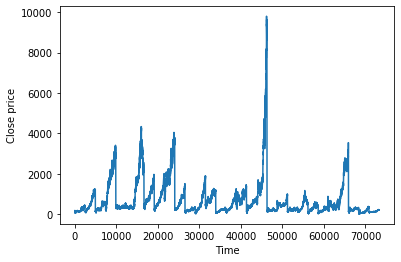

In [10]:
plt.plot(BSE_df.Close)
plt.xlabel("Time")
plt.ylabel("Close price")
plt.show()

In [13]:
BSE_df = BSE_df[["Date","Close"]]
BSE_df.head()

,Date,Close
0,5/6/2008,151.149994
1,5/7/2008,153.309998
2,5/8/2008,155.889999
3,5/9/2008,156.520004
4,5/12/2008,162.500000


In [19]:
BSE_df['gain'] = BSE_df.Close.pct_change(periods = 1)
BSE_df.head()

,Date,Close,gain
0,5/6/2008,151.149994,NaN
1,5/7/2008,153.309998,0.014290
2,5/8/2008,155.889999,0.016829
3,5/9/2008,156.520004,0.004041
4,5/12/2008,162.500000,0.038206


In [21]:
BSE_df = BSE_df.dropna()
BSE_df.head()

,Date,Close,gain
1,5/7/2008,153.309998,0.014290
2,5/8/2008,155.889999,0.016829
3,5/9/2008,156.520004,0.004041
4,5/12/2008,162.500000,0.038206
5,5/13/2008,158.479996,-0.024738


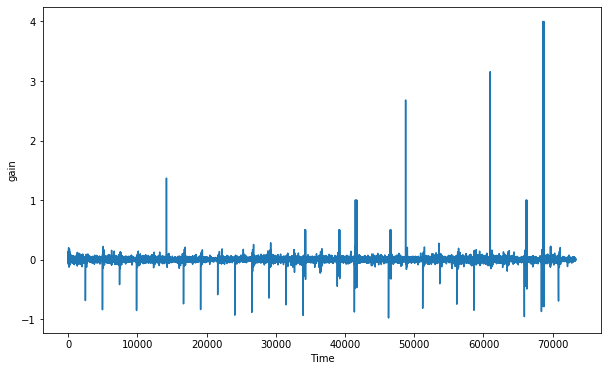

In [23]:
plt.figure(figsize = (10,6))
plt.plot(BSE_df.index , BSE_df.gain)
plt.xlabel("Time")
plt.ylabel("gain")
plt.show()

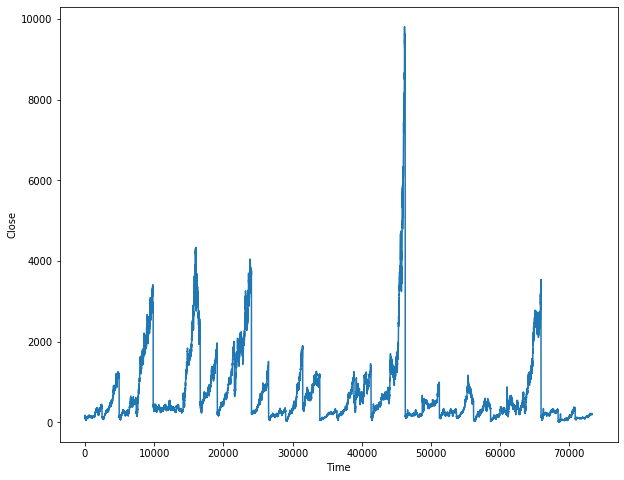

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BSE_30.csv")
df.head()

plt.figure(figsize = (10,8))
plt.plot(df.Close)
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

In [8]:
df = df[["Date","Close"]]
df.head()

,Date,Close
0,5/6/2008,151.149994
1,5/7/2008,153.309998
2,5/8/2008,155.889999
3,5/9/2008,156.520004
4,5/12/2008,162.500000


In [13]:
df["gain"] = df.Close.pct_change(periods = 1)
df.dropna().head()

,Date,Close,gain
1,5/7/2008,153.309998,0.014290
2,5/8/2008,155.889999,0.016829
3,5/9/2008,156.520004,0.004041
4,5/12/2008,162.500000,0.038206
5,5/13/2008,158.479996,-0.024738


In [15]:
print("mean = ",round(df.gain.mean(),4))
print("standard deviation = ",round(df.gain.std(),4))

mean =  0.0007
standard deviation =  0.0384


In [33]:
from scipy import stats
x = stats.norm.interval(0.95 , 
                        loc = df.gain.mean() , 
                        scale = df.gain.std())
print("gain at 95% confidence = ",np.round(x,4))

gain at 95% confidence =  [-0.0746  0.076 ]


In [2]:
from scipy import stats
y = stats.norm.cdf(-0.1,
                       loc = df.gain.mean(),
                       scale = df.gain.std())
print("making 20% profit = ",np.round(y,4))

NameError: name 'df' is not defined

In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BSE_30.csv")
df.head()
df = df[["Date","Close"]]
df.head()

df["gain"] = df.Close.pct_change(periods = 1)
df.dropna().head()

,Date,Close,gain
1,5/7/2008,153.309998,0.014290
2,5/8/2008,155.889999,0.016829
3,5/9/2008,156.520004,0.004041
4,5/12/2008,162.500000,0.038206
5,5/13/2008,158.479996,-0.024738


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15 , 8

stock_price = pd.read_csv('BSE_30.csv',parse_dates=['Date'],index_col=('Date'))
stock_price.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-05-06,ADANIPORTS,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
2008-05-07,ADANIPORTS,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2008-05-08,ADANIPORTS,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
2008-05-09,ADANIPORTS,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
2008-05-12,ADANIPORTS,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0


In [28]:
adani_ports.isnull().sum()

Symbol       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
icici_bank = stock_price[stock_price['Symbol'] == 'ICICIBANK']
icici_bank.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-05-06,ICICIBANK,169.636002,171.272995,166.927002,168.735992,76.248047,4793904.0
2008-05-07,ICICIBANK,168.727005,168.727005,164.182007,167.063995,75.492500,3533305.0
2008-05-08,ICICIBANK,165.455002,166.000000,160.544998,162.054993,73.229057,8596885.0
2008-05-09,ICICIBANK,160.000000,164.126999,157.136002,158.917999,71.811516,8006180.0
2008-05-12,ICICIBANK,156.817993,161.636002,156.572998,159.699997,72.164879,4799866.0


In [31]:
icici_bank.isnull().sum()

Symbol       0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [39]:
icici_bank.isnull().sum()

Symbol          0
Open         2469
High         2469
Low          2469
Close        2469
Adj Close    2469
Volume       2469
dtype: int64

In [41]:
def impute(dataset,variable):
    
    df = dataset.copy()
    df['new_variable'] = df[variable]
    
    random_samples = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    random_samples.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull() , 'new_variable'] = random_samples
    return df['new_variable']


In [42]:
icici_bank['Close'] = impute(icici_bank,'Close')

ValueError: a must be greater than 0 unless no samples are taken